## Questions I like to answer from this network 

1. who is popular among all marvel characters?
2. Who do they Talk for a favor?
3. Who is the one that has help other the most?

# Import libraries 

In [3]:
import chart_studio.plotly
import plotly.graph_objs as go
from chart_studio.plotly import plot, iplot
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline 
from IPython.display import display

In [2]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.0 MB/s 


In [2]:
!pip install plotly

In [28]:
!pip install python-igraph

     |████████████████████████████████| 3.2 MB 29.7 MB/s 


In [6]:
e = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Databases/edges.csv') # Edges
h = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Databases/hero-network.csv') # Hero
n = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Databases/nodes.csv') # Nodes

## Data Info

In [7]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574467 entries, 0 to 574466
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   hero1   574467 non-null  object
 1   hero2   574467 non-null  object
dtypes: object(2)
memory usage: 8.8+ MB


## No.of nodes and edge

In [8]:
he = nx.from_pandas_edgelist(h, source = "hero1", target = "hero2")
nx.info(he)

'Graph with 6426 nodes and 167219 edges'

# **Network build**

In [10]:
display(h.head(5))

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [11]:
#h= h.iloc[np.r_[100:350, 500:800,1230:1900,2500:5600]]
h= h.iloc[:10000,:2]
he = nx.from_pandas_edgelist(h, source = "hero1", target = "hero2")
print(nx.info(he))

Graph with 674 nodes and 6255 edges


In [12]:
he = nx.convert_matrix.from_pandas_edgelist(h, source = "hero1", target = "hero2")
nx.set_node_attributes(he, h)

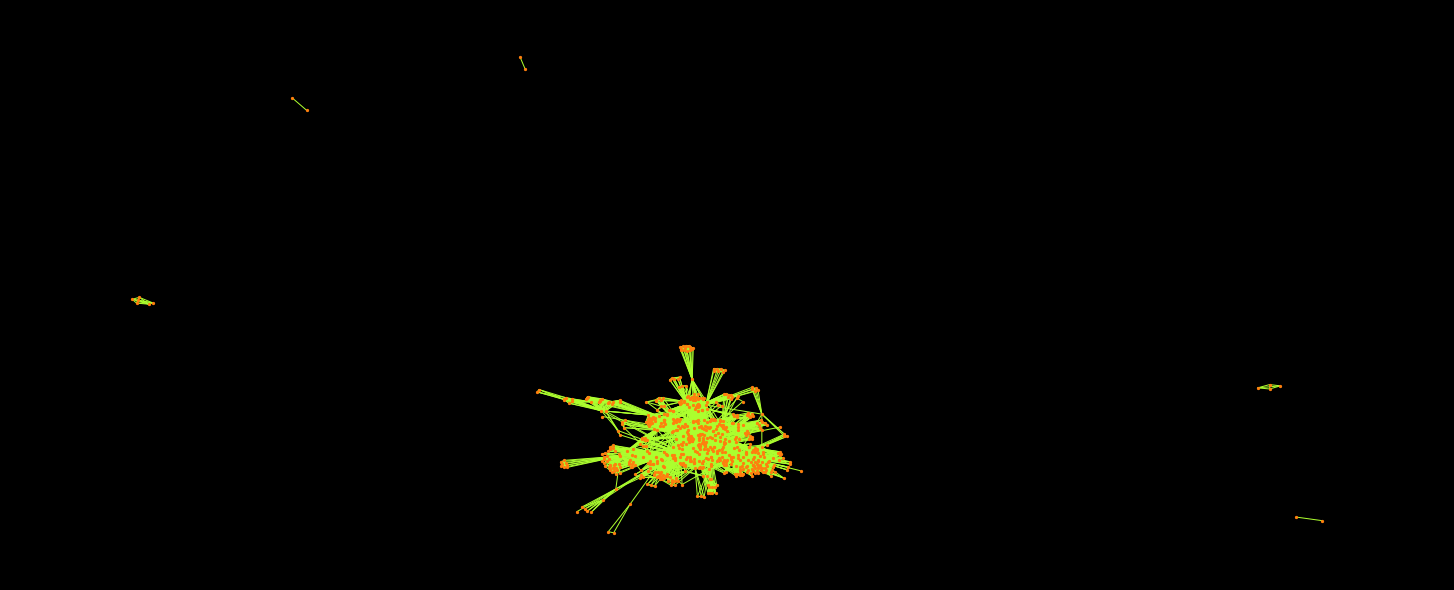

In [45]:
fig = plt.figure(figsize = (20, 8))
nx.draw(he, 
        node_size = 5,
        node_color = 'C1',
        edge_color='greenyellow')
fig.set_facecolor('k')

## Giant component 

In [13]:
G_cc = list(nx.connected_components(he))
display(len(G_cc))
display (G_cc[0])

6

{'4-D MAN/MERCURIO',
 'ABOMINATION/EMIL BLO',
 'ADVA',
 'AGAMOTTO',
 'ALRAUNE, MARLENE',
 'ANACONDA/BLANCHE SIT',
 'ANALYZER',
 'ANDERSON, BAXTER',
 'ANDROMEDA/ANDROMEDA ',
 'ANELLE',
 'ANGEL/WARREN KENNETH',
 'ANNIHILUS',
 'ANT-MAN II/SCOTT HAR',
 'ANT-MAN/DR. HENRY J.',
 'AQUARIUS II/',
 'ARBOGAST, BAMBI',
 'ARCANNA/ARCANNA JONE',
 'ARIES II/GROVER RAYM',
 'ARISHEM [CELESTIAL]',
 'ARIZE',
 'ARMBRUSTER, COLONEL ',
 'ASP II/CLEO',
 'ATLAS',
 'AVALANCHE/DOMINIC PE',
 'BALLANTINE, KAYLA',
 'BANNER, BETTY ROSS T',
 'BANNON, LANCE',
 'BANSHEE/SEAN CASSIDY',
 'BARON BLOOD II/VICTO',
 'BARON BLOOD/JOHN FAL',
 'BARON STRUCKER/WOLFG',
 'BATROC/GEORGES BATRO',
 'BEAST/HENRY &HANK& P',
 'BEAUTY',
 'BETELHEIM, NORMA',
 'BEYONDER',
 'BI-BEAST II',
 'BIG MAN/FREDERICK FO',
 'BILLUPS, AGENT',
 'BISHOP /',
 'BLACK BOLT/BLACKANTO',
 'BLACK CAT/FELICIA HA',
 'BLACK MAMBA/TANYA SE',
 "BLACK PANTHER/T'CHAL",
 'BLACK RACER/',
 'BLACK WIDOW/NATASHA ',
 'BLADE',
 'BLAQUESMITH',
 'BLESSING, MORGANA',
 'BLOB/

In [14]:
S = he.subgraph(G_cc[0])
node_degree = pd.Series(dict(S.degree()), name='degree')
display(node_degree)

LITTLE, ABNER            3
PRINCESS ZANDA           3
BLACK PANTHER/T'CHAL    64
STEELE, SIMON/WOLFGA     5
FORTUNE, DOMINIC         5
                        ..
RAMIREZ, LUIS            2
RAMIREZ, MARTA           2
BOLT, COUNCILMAN AND     2
OXNARD, PHIL             1
RAMIREZ, ROSA            6
Name: degree, Length: 658, dtype: int64

In [51]:
size = node_degree+80

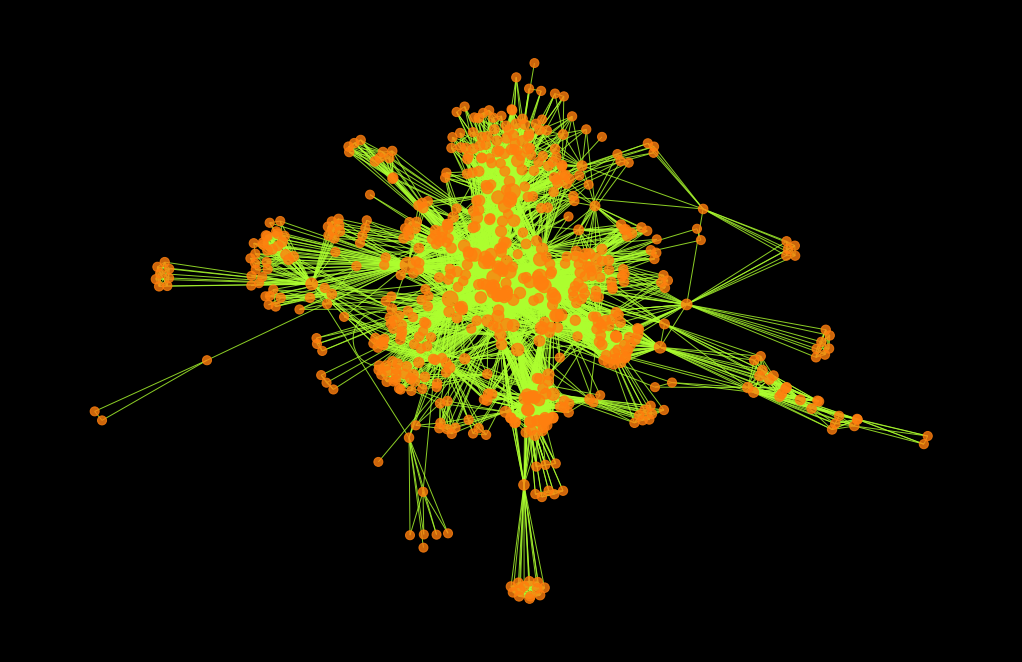

In [52]:
fig = plt.figure(figsize = (14, 9))
nx.draw(S, 
        node_size = size, 
        node_color = 'C1',
        edge_color='greenyellow', alpha=0.8)
fig.set_facecolor('k')

# Spring Layout 

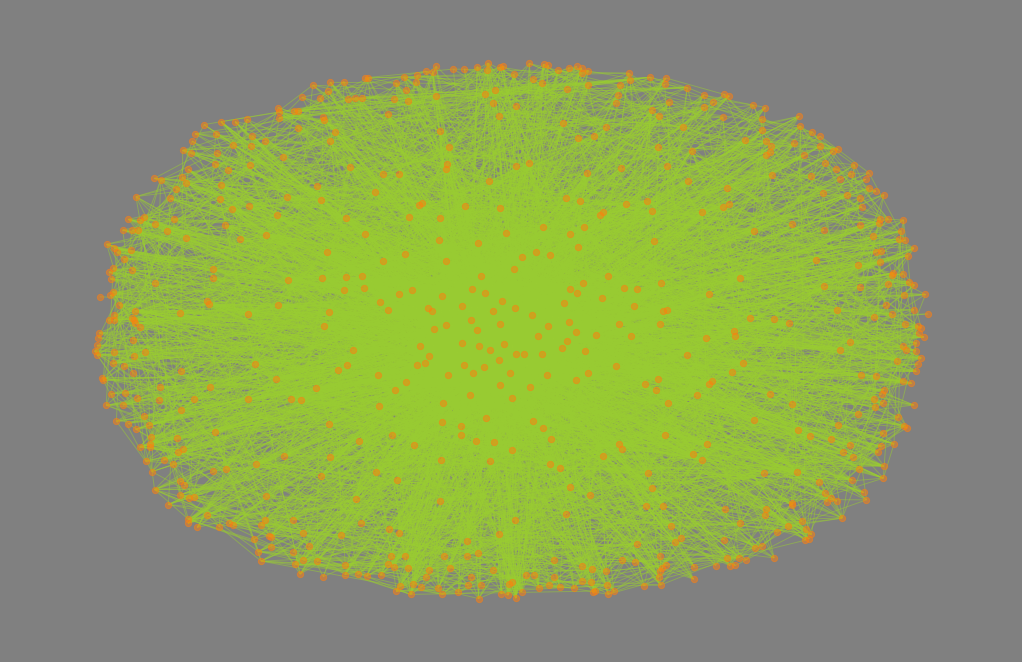

In [77]:
colors = np.linspace(0, 1, len(S.nodes))

k = 1.0
layout = nx.spring_layout(S, k = k)

fig = plt.figure(figsize = (14, 9))

nx.draw(S,
        node_size = 40, width = 1,
        node_color = 'C1', pos = layout,
        edge_color='yellowgreen', alpha=0.5)
fig.set_facecolor('gray')

# kamada_kawai_layout

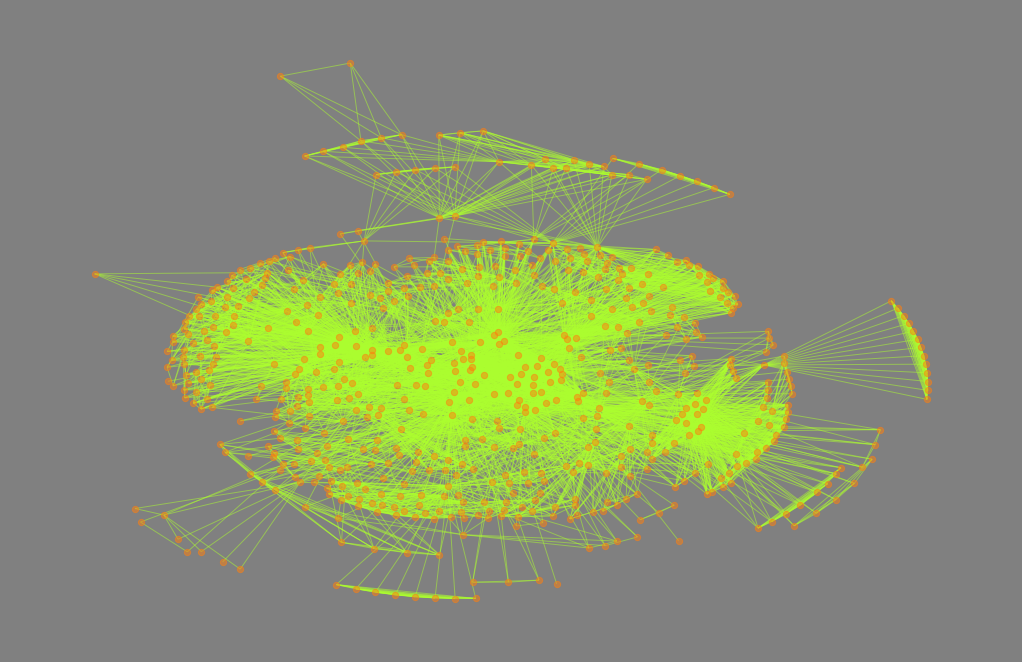

In [76]:
layout = nx.kamada_kawai_layout(S)

fig = plt.figure(figsize = (14, 9))

nx.draw(S,
        node_size = 40, width = 1,
        node_color = 'C1', pos = layout,
        edge_color='greenyellow', alpha=0.5)
fig.set_facecolor('gray')

# Spiral layout

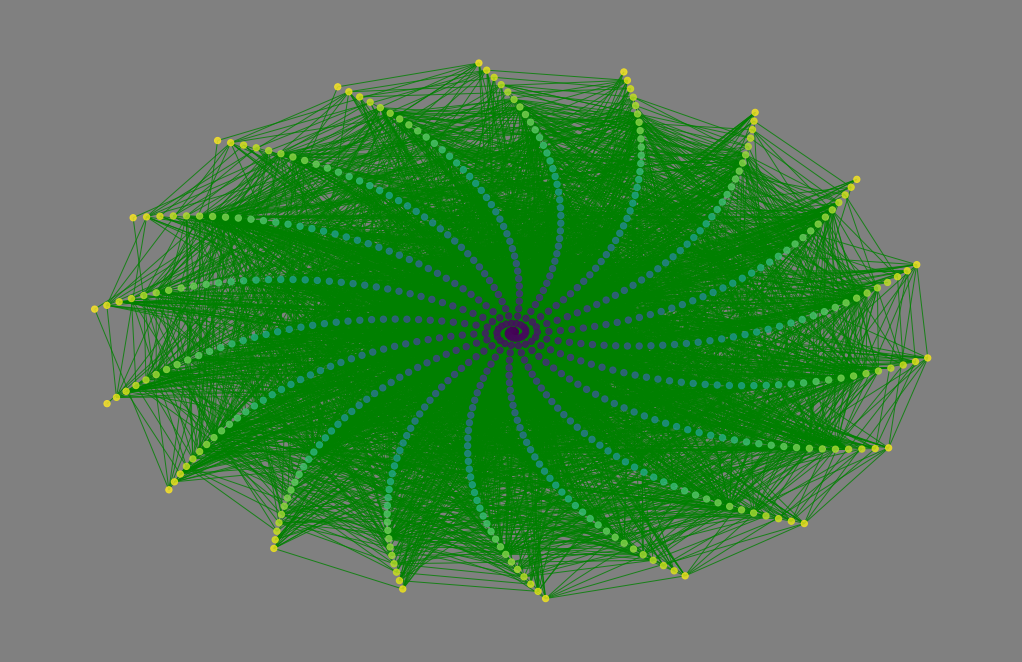

In [78]:
colors = np.linspace(0, 1, len(S.nodes))

k = 1.0
layout = nx.spiral_layout(S)

fig = plt.figure(figsize = (14, 9))

nx.draw(S,
        node_size = 40, width = 1,
        node_color = colors, pos = layout,
        edge_color='g', alpha=0.8)
fig.set_facecolor('gray')

# **Centrality measures:**

## 1. Degree Centrality

* Degree centrality assigns an importance score based simply on the number of links held by each node.

In [53]:
#Degree Centrality 
MF = nx.degree_centrality(S)

counter = 0
for w in sorted(MF, key = MF.get , reverse = True):
    counter = counter + 1
    if counter == 10:
        break
    print(w,'{:0.2f}'.format(MF[w]))

CAPTAIN AMERICA 0.26
SPIDER-MAN/PETER PAR 0.25
IRON MAN/TONY STARK  0.24
BEAST/HENRY &HANK& P 0.19
ANGEL/WARREN KENNETH 0.18
CYCLOPS/SCOTT SUMMER 0.18
HULK/DR. ROBERT BRUC 0.16
MARVEL GIRL/JEAN GRE 0.16
THING/BENJAMIN J. GR 0.16


* It helps in finding very connected individuals, popular individuals, individuals who are likely to hold most information or individuals who can quickly connect with the wider network.
* so CAPTAIN AMERICA is popular character among all marvel characters.

In [55]:
M_F = nx.degree_centrality(S)
display(M_F)

{'4-D MAN/MERCURIO': 0.0441400304414003,
 'ABOMINATION/EMIL BLO': 0.0091324200913242,
 'ADVA': 0.0167427701674277,
 'AGAMOTTO': 0.015220700152207,
 'ALRAUNE, MARLENE': 0.0213089802130898,
 'ANACONDA/BLANCHE SIT': 0.0197869101978691,
 'ANALYZER': 0.0076103500761035,
 'ANDERSON, BAXTER': 0.0076103500761035,
 'ANDROMEDA/ANDROMEDA ': 0.076103500761035,
 'ANELLE': 0.0167427701674277,
 'ANGEL/WARREN KENNETH': 0.1811263318112633,
 'ANNIHILUS': 0.0258751902587519,
 'ANT-MAN II/SCOTT HAR': 0.0167427701674277,
 'ANT-MAN/DR. HENRY J.': 0.091324200913242,
 'AQUARIUS II/': 0.0243531202435312,
 'ARBOGAST, BAMBI': 0.0136986301369863,
 'ARCANNA/ARCANNA JONE': 0.0684931506849315,
 'ARIES II/GROVER RAYM': 0.0228310502283105,
 'ARISHEM [CELESTIAL]': 0.0136986301369863,
 'ARIZE': 0.0197869101978691,
 'ARMBRUSTER, COLONEL ': 0.0243531202435312,
 'ASP II/CLEO': 0.0197869101978691,
 'ATLAS': 0.0091324200913242,
 'AVALANCHE/DOMINIC PE': 0.0121765601217656,
 'BALLANTINE, KAYLA': 0.0989345509893455,
 'BANNER, B

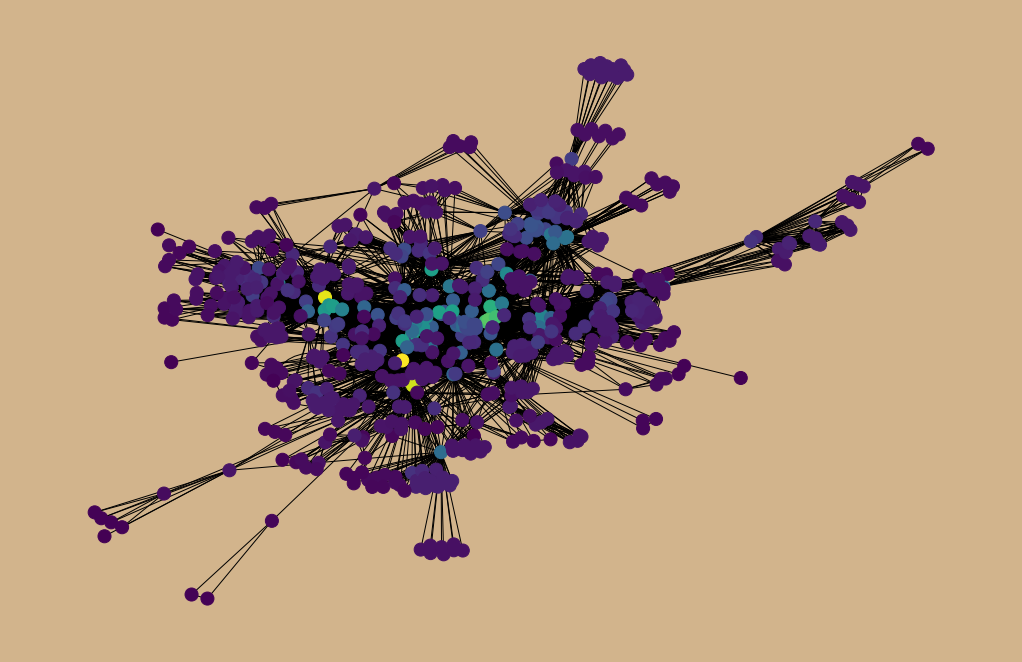

In [57]:
fig = plt.figure(figsize = (14, 9))


colors = list(M_F.values())  # to get color values
size = [x+170 for x in list(M_F.values())]
nx.draw(S, 
        node_size = size,
        node_color = colors,
        edge_color = 'k')
fig.set_facecolor('tan')

## 2. EigenVector Centrality

In [60]:
#EigenVector
EV = nx.eigenvector_centrality(S)
counter = 0
for w in sorted(EV, key =EV.get,  reverse = True):
    counter = counter + 1
    if counter == 10:
        break
    print(w,"{:0.4f}".format(EV[w]))

CAPTAIN AMERICA 0.1870
IRON MAN/TONY STARK  0.1789
BEAST/HENRY &HANK& P 0.1780
ANGEL/WARREN KENNETH 0.1746
CYCLOPS/SCOTT SUMMER 0.1671
THING/BENJAMIN J. GR 0.1650
MARVEL GIRL/JEAN GRE 0.1621
MR. FANTASTIC/REED R 0.1619
INVISIBLE WOMAN/SUE  0.1582


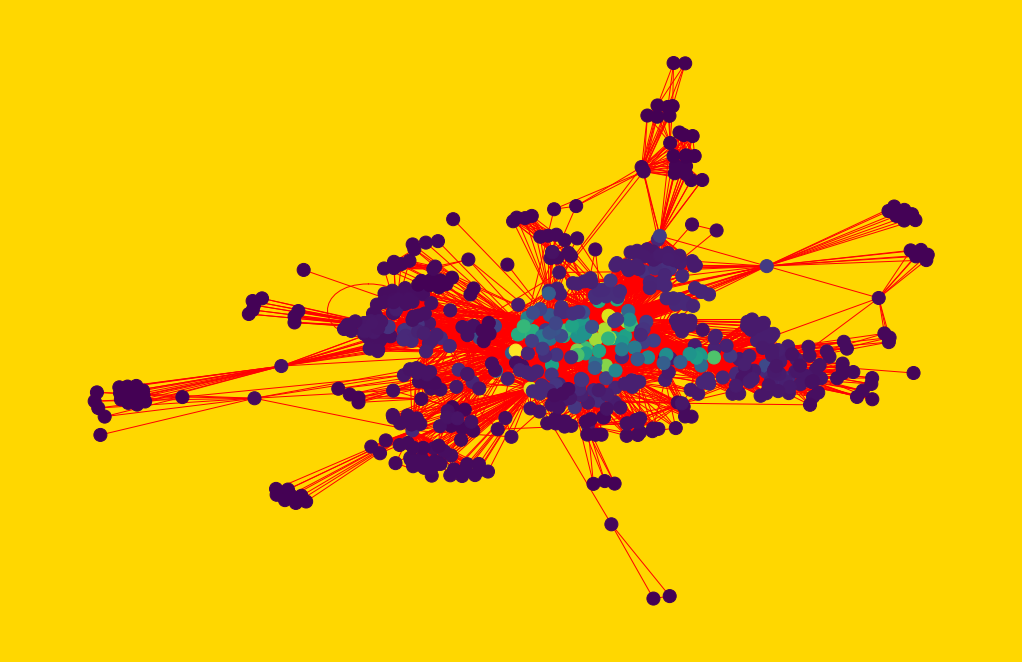

In [62]:
fig = plt.figure(figsize = (14, 9))


colors = list(EV.values())  # to get color values
size = [x+170 for x in list(EV.values())]
nx.draw(S, 
        node_size = size,
        node_color = colors,
        edge_color = 'r')
fig.set_facecolor('gold')

## 3. Betweeness Centrality

In [68]:
#Betweeness_Centrality
BC = nx.betweenness_centrality(S)
counter = 0
for w in sorted(BC, key =BC.get,  reverse = True):
    counter = counter + 1
    if counter == 10:
        break
    print(w,"{:0.4f}".format(BC[w]))

CAPTAIN AMERICA 0.1513
IRON MAN/TONY STARK  0.1503
SPIDER-MAN/PETER PAR 0.1229
DR. STRANGE/STEPHEN  0.0863
HULK/DR. ROBERT BRUC 0.0648
SUB-MARINER/NAMOR MA 0.0602
MOONDRAGON/HEATHER D 0.0501
BEAST/HENRY &HANK& P 0.0468
CYCLOPS/SCOTT SUMMER 0.0457


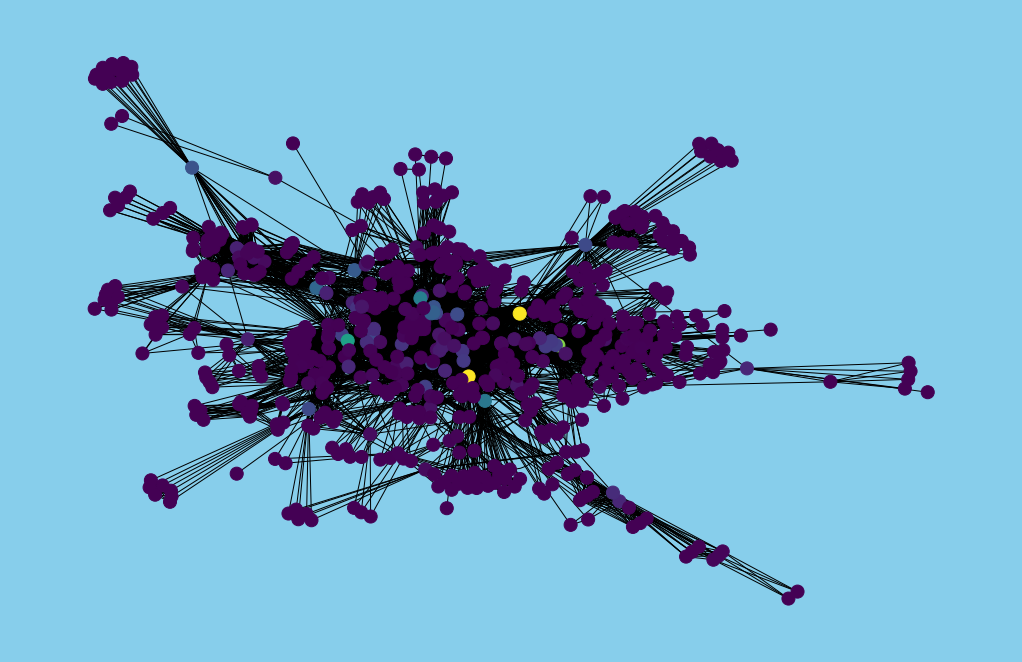

In [69]:
fig = plt.figure(figsize = (14, 9))


colors = list(BC.values())  # to get color values
size = [x+170 for x in list(BC.values())]
nx.draw(S, 
        node_size = size,
        node_color = colors,
        edge_color = 'k')
fig.set_facecolor('skyblue')

## 4. Closeness Centrality 

In [15]:
#Closeness_Centrality
CC = nx.closeness_centrality(S)
counter = 0
for w in sorted(CC, key =CC.get,  reverse = True):
    counter = counter + 1
    if counter == 10:
        break
    print(w,"{:0.4f}".format(CC[w]))

CAPTAIN AMERICA 0.5421
IRON MAN/TONY STARK  0.5341
BEAST/HENRY &HANK& P 0.5248
ANGEL/WARREN KENNETH 0.5198
CYCLOPS/SCOTT SUMMER 0.5113
HULK/DR. ROBERT BRUC 0.5066
MARVEL GIRL/JEAN GRE 0.5058
ICEMAN/ROBERT BOBBY  0.5058
SPIDER-MAN/PETER PAR 0.5042


In [64]:
CC = nx.closeness_centrality(S)
display(CC)

{'4-D MAN/MERCURIO': 0.3329954384186518,
 'ABOMINATION/EMIL BLO': 0.3372689938398357,
 'ADVA': 0.3799884326200116,
 'AGAMOTTO': 0.3478030704076231,
 'ALRAUNE, MARLENE': 0.3421875,
 'ANACONDA/BLANCHE SIT': 0.2569417285881893,
 'ANALYZER': 0.338659793814433,
 'ANDERSON, BAXTER': 0.33883445074780816,
 'ANDROMEDA/ANDROMEDA ': 0.4403485254691689,
 'ANELLE': 0.3485411140583554,
 'ANGEL/WARREN KENNETH': 0.5197784810126582,
 'ANNIHILUS': 0.3786743515850144,
 'ANT-MAN II/SCOTT HAR': 0.33971044467425027,
 'ANT-MAN/DR. HENRY J.': 0.4799123447772096,
 'AQUARIUS II/': 0.35784313725490197,
 'ARBOGAST, BAMBI': 0.3666294642857143,
 'ARCANNA/ARCANNA JONE': 0.375214163335237,
 'ARIES II/GROVER RAYM': 0.35571196534921495,
 'ARISHEM [CELESTIAL]': 0.3547516198704104,
 'ARIZE': 0.3603949533735601,
 'ARMBRUSTER, COLONEL ': 0.354177897574124,
 'ASP II/CLEO': 0.2569417285881893,
 'ATLAS': 0.2794555508294343,
 'AVALANCHE/DOMINIC PE': 0.28052946199829204,
 'BALLANTINE, KAYLA': 0.38601645123384254,
 'BANNER, BETT

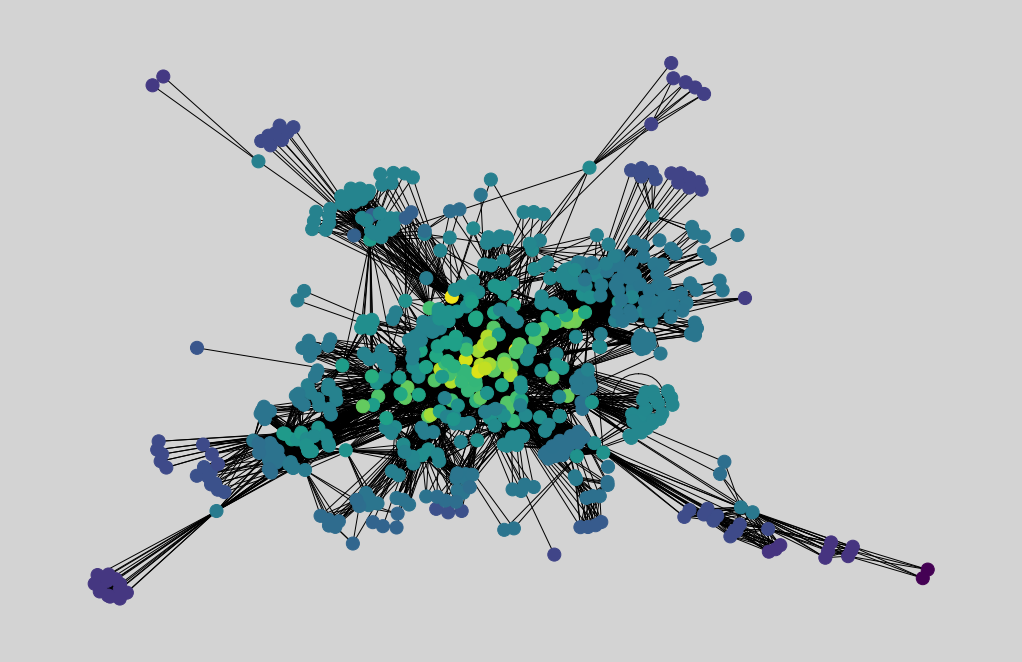

In [67]:
fig = plt.figure(figsize = (14, 9))


colors = list(CC.values())  # to get color values
size = [x+170 for x in list(CC.values())]
nx.draw(S, 
        node_size = size,
        node_color = colors,
        edge_color = 'k')
fig.set_facecolor('lightgray')